# How Have NBA Statistics Changed Overtime?

# Data Loading

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# pip install matplotlib

# run this cell if the above import statement gives you an error about matplotlib not being found

In [49]:
regular_df = pd.read_csv('regular.csv')
regular_df.set_index('Season', inplace=True)
regular_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2025-26,1,NBA,26.4,6-7,216.0,213,242.0,41.8,89.2,13.4,...,0.468,0.358,0.791,100.5,0.543,13.2,26.4,0.227,115.6,0.583
2024-25,2,NBA,26.3,6-7,215.0,1230,241.3,41.7,89.2,13.5,...,0.467,0.360,0.780,98.8,0.543,12.6,25.2,0.189,114.5,0.576
2023-24,3,NBA,26.4,6-7,216.0,1230,241.4,42.2,88.9,12.8,...,0.474,0.366,0.784,98.5,0.547,12.1,24.2,0.192,115.3,0.580
2022-23,4,NBA,26.1,6-6,216.0,1230,241.8,42.0,88.3,12.3,...,0.475,0.361,0.782,99.2,0.545,12.5,24.0,0.208,114.8,0.581
2021-22,5,NBA,26.1,6-6,215.0,1230,241.4,40.6,88.1,12.4,...,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0,0.566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,76,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,NaN,...,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN,0.428
1949-50,77,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,NaN,...,0.340,NaN,0.712,NaN,0.340,NaN,NaN,0.284,NaN,0.410
1948-49,78,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,NaN,...,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN,0.390


In [50]:
playoffs_df = pd.read_csv('playoffs.csv')
playoffs_df.set_index('Season', inplace=True)
playoffs_df

,Rk,Lg,Age,Ht,Wt,G,MP,FG,FGA,3P,...,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg,TS%
Season,,,,,,,,,,,,,,,,,,,,,
2024-25,1,NBA,26.3,6-7,215.0,84,241.5,38.9,85.6,12.4,...,0.455,0.354,0.775,95.6,0.528,12.8,25.9,0.215,113.0,0.566
2023-24,2,NBA,26.4,6-7,216.0,82,240.9,39.0,84.4,11.7,...,0.462,0.351,0.779,92.7,0.532,11.6,24.1,0.188,113.5,0.566
2022-23,3,NBA,26.1,6-6,216.0,84,241.2,40.2,87.2,12.0,...,0.461,0.351,0.794,96.1,0.530,11.7,24.0,0.197,113.5,0.566
2021-22,4,NBA,26.1,6-6,215.0,87,240.3,38.2,83.7,12.3,...,0.456,0.355,0.785,95.5,0.529,12.8,22.3,0.212,111.2,0.567
2020-21,5,NBA,26.1,6-6,217.0,85,241.2,40.2,86.9,12.5,...,0.462,0.364,0.786,96.1,0.534,11.2,22.8,0.201,114.3,0.571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1950-51,75,NBA,NaN,NaN,NaN,26,NaN,29.5,78.4,NaN,...,0.376,NaN,0.723,NaN,0.376,NaN,NaN,0.308,NaN,0.446
1949-50,76,NBA,NaN,NaN,NaN,30,NaN,26.9,78.3,NaN,...,0.344,NaN,0.732,NaN,0.344,NaN,NaN,0.343,NaN,0.427
1948-49,77,BAA,NaN,NaN,NaN,20,NaN,26.8,81.5,NaN,...,0.329,NaN,0.717,NaN,0.329,NaN,NaN,0.306,NaN,0.405


# Exploratory Data Analysis (EDA)

In [51]:
regular_df.columns

Index(['Rk', 'Lg', 'Age', 'Ht', 'Wt', 'G', 'MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'FG%', '3P%', 'FT%', 'Pace', 'eFG%', 'TOV%', 'ORB%', 'FT/FGA',
       'ORtg', 'TS%'],
      dtype='object')

### Columns we care about - purely scoring related statistics

- field goals per game (FG)
- field goal attempts per game (FGA)
- 3 pointers per game (3P)
- 3 point attempts per game (3PA)
- free throws per game (FT)
- free throw attempts per game (FTA)


- field goal percentage (FG%)
- 3 point percentage (3P%)
- free throw percentage (FT%)
- effective field goal percentage (eFG%)
- true shooting percentage (TS%)



In [52]:
desired_columns = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'FG', 'eFG%']

In [53]:
filtered_regular = regular_df[desired_columns]
filtered_regular

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%
Season,,,,,,,,,,,
2025-26,41.8,89.2,0.468,13.4,37.3,0.358,20.2,25.5,0.791,41.8,0.543
2024-25,41.7,89.2,0.467,13.5,37.6,0.360,16.9,21.7,0.780,41.7,0.543
2023-24,42.2,88.9,0.474,12.8,35.1,0.366,17.0,21.7,0.784,42.2,0.547
2022-23,42.0,88.3,0.475,12.3,34.2,0.361,18.4,23.5,0.782,42.0,0.545
2021-22,40.6,88.1,0.461,12.4,35.2,0.354,16.9,21.9,0.775,40.6,0.532
...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.8,83.6,0.357,NaN,NaN,NaN,24.5,33.4,0.733,29.8,0.357
1949-50,28.2,83.1,0.340,NaN,NaN,NaN,23.6,33.1,0.712,28.2,0.340
1948-49,29.0,88.7,0.327,NaN,NaN,NaN,22.0,31.3,0.703,29.0,0.327


In [54]:
filtered_playoffs = playoffs_df[desired_columns]
filtered_playoffs

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%
Season,,,,,,,,,,,
2024-25,38.9,85.6,0.455,12.4,35.2,0.354,18.4,23.8,0.775,38.9,0.528
2023-24,39.0,84.4,0.462,11.7,33.4,0.351,15.9,20.3,0.779,39.0,0.532
2022-23,40.2,87.2,0.461,12.0,34.3,0.351,17.2,21.6,0.794,40.2,0.530
2021-22,38.2,83.7,0.456,12.3,34.6,0.355,17.7,22.6,0.785,38.2,0.529
2020-21,40.2,86.9,0.462,12.5,34.3,0.364,17.5,22.2,0.786,40.2,0.534
...,...,...,...,...,...,...,...,...,...,...,...
1950-51,29.5,78.4,0.376,NaN,NaN,NaN,24.2,33.5,0.723,29.5,0.376
1949-50,26.9,78.3,0.344,NaN,NaN,NaN,26.8,36.7,0.732,26.9,0.344
1948-49,26.8,81.5,0.329,NaN,NaN,NaN,25.0,34.8,0.717,26.8,0.329


### Checking if any columns have Null values

In [55]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
dtype: int64

In [56]:
filtered_regular.isnull().sum()

FG       0
FGA      0
FG%      0
3P      33
3PA     33
3P%     33
FT       0
FTA      0
FT%      0
FG       0
eFG%     0
dtype: int64

In [57]:
two_seasons = filtered_regular.loc[["1979-80", "1978-79"]]
two_seasons

,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,FG,eFG%
Season,,,,,,,,,,,
1979-80,43.6,90.6,0.481,0.8,2.8,0.28,21.3,27.8,0.764,43.6,0.486
1978-79,44.5,91.7,0.485,NaN,NaN,NaN,21.3,28.3,0.752,44.5,0.485


These Null values in the three point column make sense because the three point line was added in the 1979-80 season, so no data would exist before this

Things we can do:

- Fill in the missing data with 0s
- Choose to only look at data after the three point line
- Choose a smaller subset of more recent, modern data after the game got developed around the new rule

### Comparing Averages

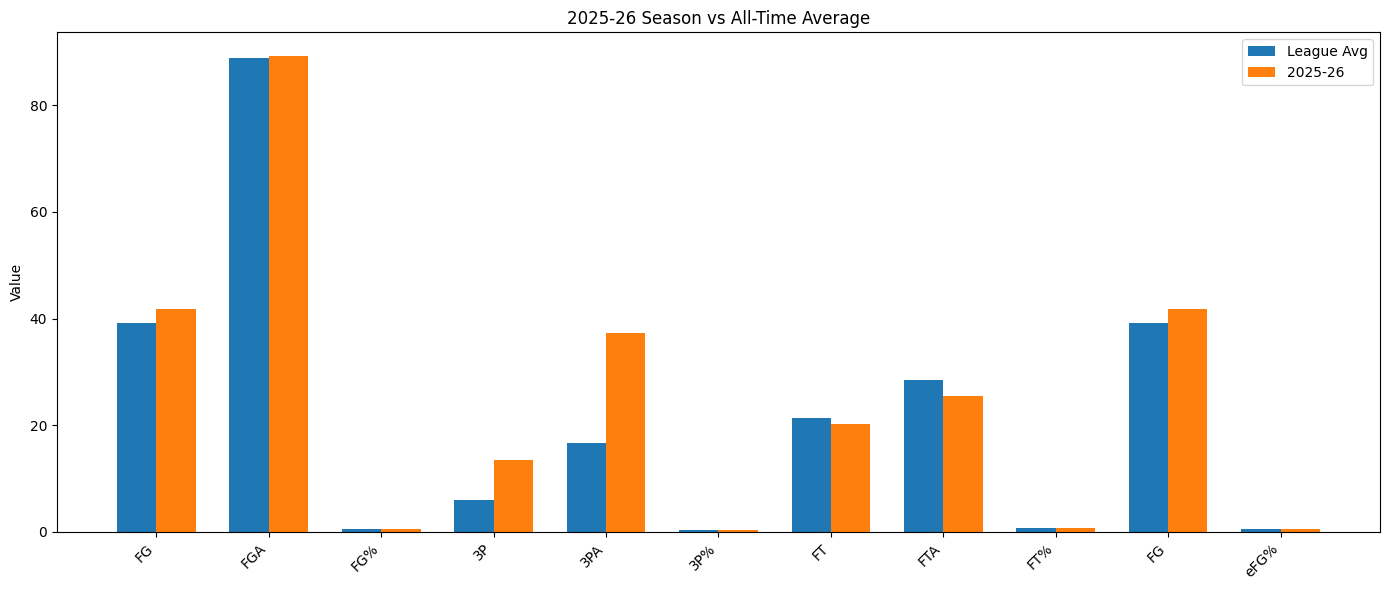

In [68]:
league_avg = filtered_regular.mean()

current = filtered_regular.loc["2025-26"]

compare = pd.DataFrame({
    "League Avg": league_avg,
    "2025-26": current
})

x = np.arange(len(compare.index))
width = 0.35   # width of each bar

plt.figure(figsize=(14, 6))

plt.bar(x - width/2, compare["League Avg"], width, label="League Avg")
plt.bar(x + width/2, compare["2025-26"], width, label="2025-26")

plt.xticks(x, compare.index, rotation=45, ha="right")
plt.ylabel("Value")
plt.title("2025-26 Season vs All-Time Average")
plt.legend()

plt.tight_layout()
plt.show()